###  MicroGrad demo

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mycrograd_debug.engine_debug import Value
from mycrograd_debug.nn_debug import Neuron, Layer, MLP
from mycrograd_debug.drawviz_debug import draw_dot, draw_nn
from mycrograd_debug.util_debug import (
    debugPrint,
    print_my_params,
    print_all_values,
    backupParameters,
    restoreParameters,
)
import pprint
np.random.seed(1337)
random.seed(1337)
number_of_samples=3
number_of_iterations=10
pp = pprint.PrettyPrinter(indent=4)
debug_values = False
global total_loss
global scores

In [2]:
# make up a dataset

from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=number_of_samples, noise=0.1)
pp.pprint(X)
pp.pprint(y)
y = y*2 - 1 # make y be -1 or 1
pp.pprint(y)

array([[ 2.02183808,  0.35430742],
       [ 0.82773723,  0.0961832 ],
       [-0.09199463,  0.39034151]])
array([1, 0, 1])
array([ 1, -1,  1])


In [3]:
# initialize a model 
# model = MLP(2, [16, 16, 1]) # 2-layer neural network
model = MLP(2, [2, 1], lastReLU=True, debug_bw=False) # 2-layer neural network
# print(model)
# pp.pprint(model.parameters())
# pp.pprint(model.layers)

Xb, yb = X, y
print(Xb, yb)
inputs = [list(map(Value, xrow)) for xrow in Xb]

# xinput = [Value(x, type="i%s" % index) 
          
# for index, x in enumerate(xinumbers, start=1)]

for c,vline in enumerate(inputs,start=1):
    print(c)
    for r,v in enumerate(vline,start=1):
        v.type="i%s" % r
        # print(v)


print("inputs:")
pp.pprint(inputs)

print("activation of first input:")
print(model(inputs[0]))

Module nn MLP: structure [2, 2, 1]
[[ 2.02183808  0.35430742]
 [ 0.82773723  0.0961832 ]
 [-0.09199463  0.39034151]] [ 1 -1  1]
1
2
3
inputs:
[   [   Value(name=v010,layernumber=,neuronnumber=,weightnumber=,type=i1,data=2.0218380834585634, grad=0),
        Value(name=v011,layernumber=,neuronnumber=,weightnumber=,type=i2,data=0.354307418548199, grad=0)],
    [   Value(name=v012,layernumber=,neuronnumber=,weightnumber=,type=i1,data=0.8277372309744037, grad=0),
        Value(name=v013,layernumber=,neuronnumber=,weightnumber=,type=i2,data=0.09618319872606, grad=0)],
    [   Value(name=v014,layernumber=,neuronnumber=,weightnumber=,type=i1,data=-0.09199462906425576, grad=0),
        Value(name=v015,layernumber=,neuronnumber=,weightnumber=,type=i2,data=0.3903415102448996, grad=0)]]
activation of first input:
Value(name=v029,layernumber=L2,neuronnumber=N1,weightnumber=,type=a,data=-0.3341301148808096, grad=0)


In [4]:
# loss function
def loss():
    global total_loss
    global scores
    # forward the model to get scores
    scores = list(map(model, inputs))
    print("scores")
    pp.pprint(scores)

    # print("scores calculation with lamba function")
    # result = map(lambda x: model(x), inputs)
    # pp.pprint(list(result))

    # svm "max-margin" loss
    losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))
    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss
    
    # also get accuracy
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

# total_loss, acc = loss()
# print(total_loss, acc)

In [5]:
def act():
    global total_loss
    # forward
    total_loss, acc = loss()
    # print("step %d loss calc" %k)
    if debug_values:
        print_all_values(total_loss)
    

In [6]:
def zero():
    global total_loss
    model.zero_grad()
    # print("step %d zero grad" %k)
    if debug_values:
        print_all_values(total_loss)
    dot=draw_dot(total_loss)
    dot

In [7]:
def back():
    global total_loss
    # backward
    total_loss.backward()
    # print("step %d backward" %k)
    if debug_values:
        print_all_values(total_loss)
    dot=draw_dot(total_loss)
    dot    

In [8]:
def upd(k):
    # update (sgd)
    learning_rate = 1.0 - 0.9*k/100
    for p in model.parameters():
        p.data -= learning_rate * p.grad

In [9]:
def opt():
    # optimization
    for k in range(number_of_iterations):
        print("start step %d" %k)
        # if k % 1 == 0:
        #     print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")
        # print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")
        print(f"step {k} loss {total_loss.data}")


scores
[   Value(name=v043,layernumber=L2,neuronnumber=N1,weightnumber=,type=a,data=-0.3341301148808096, grad=0),
    Value(name=v057,layernumber=L2,neuronnumber=N1,weightnumber=,type=a,data=-0.1346183875256753, grad=0),
    Value(name=v071,layernumber=L2,neuronnumber=N1,weightnumber=,type=a,data=0.05658290555345683, grad=0)]


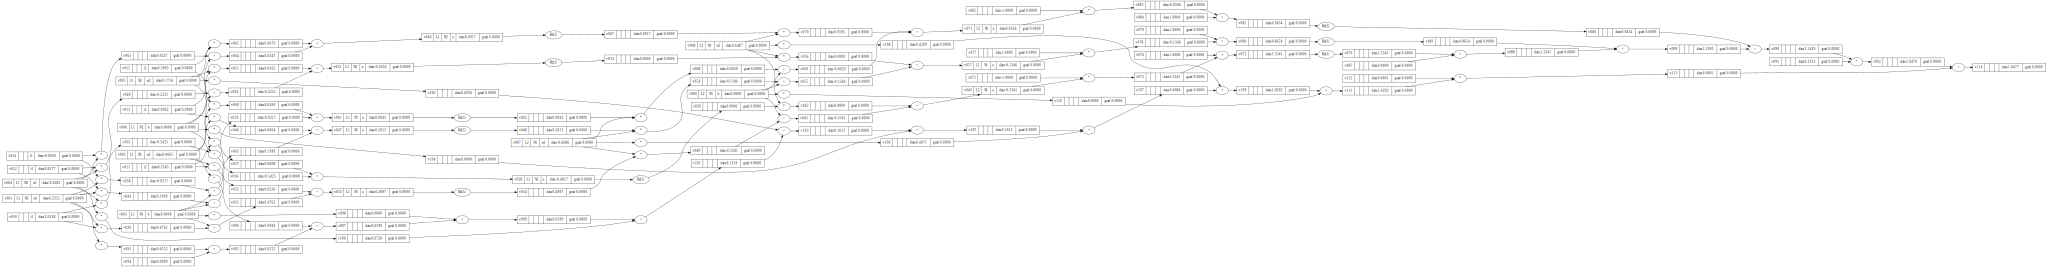

In [10]:
act()
draw_dot(total_loss)

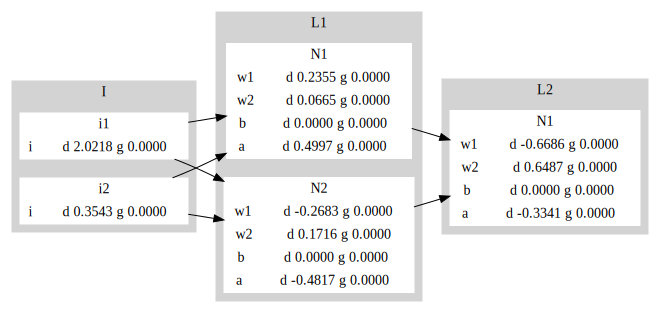

In [11]:
act=model(inputs[0])
draw_nn(inputs[0], model)

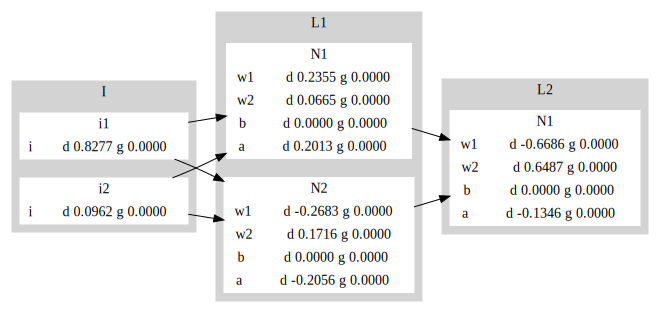

In [12]:
act=model(inputs[1])
draw_nn(inputs[1], model)